[View in Colaboratory](https://colab.research.google.com/github/Con-Mi/Pattern-Recognition-and-Machine-Learning/blob/master/Clustering_Evaluation.ipynb)

# Clustering Analysis with different measures.

Here I will consider the evaluation metrics $\textbf{Silhouette score}$ and $\textbf{Mutual Information score}$, for evaluating a clustering algorithm.

The $\textbf{Silhoutte coefficient}$ for a single sample $\textbf{s}_i$ is descried as $s_i = \frac{b - a}{max(a, b)}$, where 

$\textbf{a}$ is the mean distance between sample and all other points in the same class,

$\textbf{b}$ is the mean distance between a sample and all other points in the next nearest cluster.

The coefficient is then calculated as the mean of the Silhouette Coefficient for each sample.

$\textbf{Interpretation}$: The coefficient is bounded between -1, +1, and higher coefficient means better results. Coefficient close to 0 means overlapping clusetrs

The $\textbf{Mutual Information Score}$ is an information theoretic measure

Assume two label assignments (of the same N objects), U and V. Their entropy is the amount of uncertainty for a partition set, defined by:

$H(U) = - \sum_{i=1}^{|U|}P(i)\log(P(i))$. Entropy for the label U.

$P(i) = \frac{|U_i|}{N}$ is the probability that an object picked at random from U falls into class U_i. Likewise for V:

$H(V) = - \sum_{j=1}^{|V|}P'(j)\log(P'(j))$

With $P'(j) = \frac{|V_j|}{N}$. The mutual information (MI) between U and V is calculated by:

$\text{MI}(U, V) = \sum_{i=1}^{|U|}\sum_{j=1}^{|V|}P(i, j)\log\left(\frac{P(i,j)}{P(i)P'(j)}\right)$

where $P(i, j) = \frac{|U_i \cap V_j|}{N}$ is the joint probability that an object picked at random falls into both classes $U_i$ and $V_j$.

$log_2$ provides measuring the entropy in bits.

$\textbf{Interpretation}$: The Mutual information index requires the labels of the data, and its compared with the predicted labels. 

Therefore is not very well suited for purely unsupervised tasks, rather its a measure for evaluating the number of clusters when trying models. This information metric is bounded between [0, 1], where higher and close to 1 is better.


In [81]:
# First lets load a dataset and other helpful libraries

from sklearn.datasets import load_wine
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

wine_data = load_wine()
X = wine_data.data
y = wine_data.target
wine_df = pd.DataFrame(X, columns= wine_data.feature_names) # Making the data into a dataframe for visualization purposes
target_names = wine_data.target_names
wine_df['labels'] = y
wine_df.head()  # Visual representation of how the data look like in a relational array.

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,labels
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the data wit removing the mean and to unit variance.
reduced_data = pca.fit_transform(X_scaled) # Transform the data to a 2 dimensional representation, for visualization purposes.

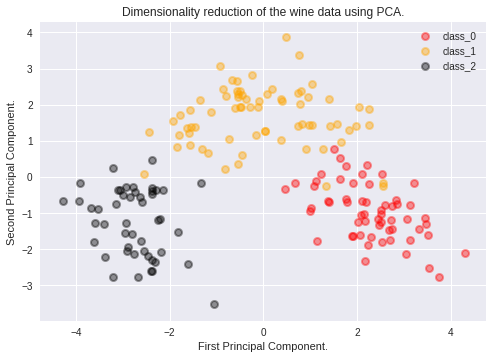

In [83]:
# Ploting a scatter plot of the principal components

plt.figure()
colors = ['red', 'orange', 'black']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(reduced_data[y == i, 0], reduced_data[y== i, 1], color=color, alpha=.4, lw=lw,
                label=target_name)
plt.title("Dimensionality reduction of the wine data using PCA.")
plt.xlabel("First Principal Component.")
plt.ylabel("Second Principal Component.")
plt.legend()
plt.show()

In [96]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, mutual_info_score

print("Calculating the Silhouette score of kMeans for different number of clusters.")
print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
for i in range(5):
  k_means_preds = KMeans(n_clusters = i+2).fit_predict(reduced_data)
  print("For n_clusters = ", i+2 ,",the Silhouette score is  = ",silhouette_score(reduced_data, k_means_preds))
  
print('\n')
print("Calculating the Mutual Information score of kMeans for different clusters.")
print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
for i in range(5):
  k_means_preds = KMeans(n_clusters = i+2).fit_predict(reduced_data)
  print("For n_clusters = ", i+2 ,",the Mutual Information score is  = ",mutual_info_score(y, k_means_preds))

Calculating the Silhouette score of kMeans for different number of clusters.
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
For n_clusters =  2 ,the Silhouette score is  =  0.46491409089201524
For n_clusters =  3 ,the Silhouette score is  =  0.5610505693103248
For n_clusters =  4 ,the Silhouette score is  =  0.49164110075463185
For n_clusters =  5 ,the Silhouette score is  =  0.44018227517143693
For n_clusters =  6 ,the Silhouette score is  =  0.43227510669772384


Calculating the Mutual Information score of kMeans for different clusters.
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
For n_clusters =  2 ,the Mutual Information score is  =  0.4253837669989022
For n_clusters =  3 ,the Mutual Information score is  =  0.9600375185493739
For n_clusters =  4 ,the Mutual Information score is  =  0.8934332693469788
For n_clusters =  5 ,the Mutual Information score is  =  0.8909483900968213
For n_clusters =  6 ,the Mutual Information 

In [109]:
print("Calculating the Silhouette score of the Gaussian Mixture Model for different number of clusters.")
print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
for i in range(5):
  gmm_tmp = GaussianMixture(n_components = i+2).fit(reduced_data)
  gmm_pred = gmm_tmp.predict(reduced_data)
  print("For n_clusters = ", i+2 ,",the Silhouette score is  = ",silhouette_score(reduced_data, gmm_pred))
  
print('\n')
print("Calculating the Mutual Information score of the Gaussian Mixture Model for different number of clusters.")
print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
for i in range(5):
  gmm_tmp = GaussianMixture(n_components = i+2).fit(reduced_data)
  gmm_pred = gmm_tmp.predict(reduced_data)
  print("For n_clusters = ", i+2 ,",the Mutual Information score is  = ",mutual_info_score(y, gmm_pred))

Calculating the Silhouette score of the Gaussian Mixture Model for different number of clusters.
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
For n_clusters =  2 ,the Silhouette score is  =  0.47220766621943805
For n_clusters =  3 ,the Silhouette score is  =  0.5591116207103002
For n_clusters =  4 ,the Silhouette score is  =  0.4842863052855045
For n_clusters =  5 ,the Silhouette score is  =  0.43485446609707074
For n_clusters =  6 ,the Silhouette score is  =  0.40735374715095807


Calculating the Mutual Information score of the Gaussian Mixture Model for different number of clusters.
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
For n_clusters =  2 ,the Mutual Information score is  =  0.4233280545829267
For n_clusters =  3 ,the Mutual Information score is  =  0.9172897189844239
For n_clusters =  4 ,the Mutual Information score is  =  0.9421816612205144
For n_clusters =  5 ,the Mutual Information score is  =  0.876297438948

In [0]:
# Final choice of 3 clusters to visualize results and compare with original data.

k_means_2 = KMeans(n_clusters = 3).fit_predict(reduced_data)
gmm_data = GaussianMixture(n_components = 3).fit(reduced_data)
gmm_preds = gmm_data.predict(reduced_data)

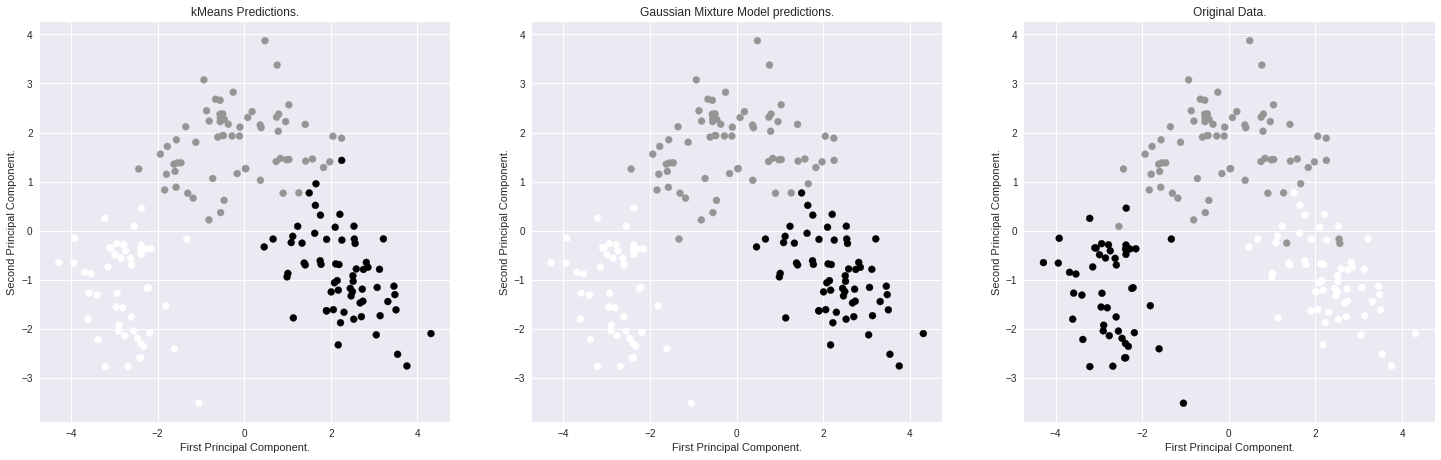

In [118]:
# Plotting Results 
## Plot the kMeans predictions
plt.figure(1, figsize = (25, 25))
plt.subplot(3,3, 1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=k_means_2)
plt.title("kMeans Predictions.")
plt.xlabel("First Principal Component.")
plt.ylabel("Second Principal Component.")

## Plot the Gaussian Mixture Model predictions
plt.subplot(3, 3, 2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=gmm_preds)
plt.title("Gaussian Mixture Model predictions.")
plt.xlabel("First Principal Component.")
plt.ylabel("Second Principal Component.")

# Plot the original data
plt.subplot(3, 3, 3)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y)
plt.title("Original Data.")
plt.xlabel("First Principal Component.")
plt.ylabel("Second Principal Component.")

plt.show()